<a href="https://colab.research.google.com/github/vithika-karan/KPMG-Virtual-Internship/blob/main/KPMG_Data_Analytics_Virtual_Experience_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement
Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organization has approached KPMG. They are looking to expand into a new market and we will be assisting them by showcasing our data analytics skills to recommend a suitable marketing strategy.

The client provided KPMG with 3 datasets:

* Customer Demographic 
* Customer Addresses
* Transactions data in the past 3 months


###Data Quality Assessment

In [378]:
#importing libraries
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'figure.figsize':(10,5),'figure.dpi':100})
%matplotlib inline

Customer Demographics

In [379]:
#reading excel sheet
xls = ("/content/drive/MyDrive/KPMG/RAW DATA/KPMG_VI_New_raw_data_update_final.xlsx")
df_demography = pd.read_excel(xls, sheet_name=3,header=0)

In [380]:
#first look
df_demography.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [381]:
#info
df_demography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [382]:
#null values
df_demography.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [383]:
#duplicates
df_demography.duplicated().sum()

0

In [384]:
#earlier we saw a corrupted column in dataset head
df_demography.drop('default',axis=1,inplace=True)

In [385]:
#no of unique values
df_demography.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [386]:
#gender
df_demography['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64

In [387]:
#replacing the inconsistent data
df_demography['gender'].replace({'U':'Unspecified','F':'Female','Femal':'Female','M':'Male'},inplace=True)

In [388]:
#let's check dob
df_demography['DOB'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

In [389]:
df_demography[df_demography['DOB'] < '1931-01-01 00:00:00']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
33,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0


In [390]:
df_demography.loc[33,'DOB']= df_demography.loc[33,'DOB'].replace(year=1977) #replaced it with datetime mean

In [391]:
#job title
df_demography['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Geologist II                             4
Health Coach III                         3
Research Assistant III                   3
Health Coach I                           3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [392]:
df_demography['job_title'].fillna(method='bfill',inplace=True)

In [393]:
#job industry category
df_demography['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [394]:
df_demography['job_industry_category'].fillna(method='ffill',inplace=True)

In [395]:
#wealth segment
df_demography['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [396]:
#deceased indicator
df_demography['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [397]:
df_demography['deceased_indicator'].replace({'N':False,'Y':True},inplace=True)

In [398]:
#owns car
df_demography['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [399]:
df_demography['owns_car'].replace({'Yes':True,'No':False},inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


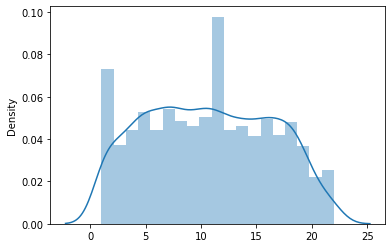

In [400]:
#tenure
sns.distplot(x=df_demography['tenure']) #kind of normal

In [401]:
df_demography['tenure'].fillna(df_demography['tenure'].mean(),inplace=True)

In [402]:
df_demography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   bool          
 10  owns_car    

In [403]:
original_customers = df_demography.copy()

**Customer Addresses**


In [404]:
#reading data
df_addresses = pd.read_excel(xls, sheet_name=4,header=1)

In [405]:
df_addresses.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [406]:
#no nulls
df_addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [407]:
df_addresses.duplicated().sum()

0

In [408]:
#unique
df_addresses.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [409]:
#replacing other values
df_addresses['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [410]:
df_addresses['state'].replace({'New South Wales':'NSW','Victoria':'VIC'},inplace=True)

In [411]:
customer_address = df_addresses.copy()

Everything else looks fine!

**New Customer List**

In [412]:
#reading data
df_ncustomers = pd.read_excel(xls, sheet_name=2,header=1)

In [413]:
df_ncustomers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.63,0.7875,0.984375,0.836719,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.56,0.5600,0.700000,0.595000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.94,0.9400,0.940000,0.940000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.63,0.7875,0.787500,0.787500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.80,0.8000,1.000000,1.000000,4,4,1.703125


In [414]:
#info
df_ncustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [415]:
#null values
df_ncustomers.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [416]:
#duplicates
df_ncustomers.duplicated().sum()

0

In [417]:
df_ncustomers.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Unnamed: 16                              71
Unnamed: 17                             129
Unnamed: 18                             182
Unnamed: 19                             318
Unnamed: 20                             324
Rank                                    324
Value                           

In [418]:
df_ncustomers.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],axis=1,inplace=True)

In [419]:
#some missing last names in new customer list
df_ncustomers['last_name'] = df_ncustomers.groupby('first_name').last_name.bfill().ffill()

In [420]:
#gender
df_ncustomers['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [421]:
df_ncustomers['gender'].replace({'U':'Unspecified'},inplace=True)

In [422]:
#dob
df_ncustomers['DOB'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                     983
unique                    958
top       1961-07-31 00:00:00
freq                        2
first     1938-06-08 00:00:00
last      2002-02-27 00:00:00
Name: DOB, dtype: object

In [423]:
df_ncustomers['DOB'].fillna(lambda x: np.random.choice(df_ncustomers['DOB']), inplace=True)

In [424]:
df_ncustomers['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [425]:
df_ncustomers['job_title'].value_counts()

Associate Professor             15
Environmental Tech              14
Software Consultant             14
Chief Design Engineer           13
Assistant Media Planner         12
                                ..
Budget/Accounting Analyst II     1
Accounting Assistant II          1
Database Administrator IV        1
Administrative Officer           1
Safety Technician II             1
Name: job_title, Length: 184, dtype: int64

In [426]:
df_ncustomers['job_title']= df_ncustomers['job_title'].fillna(method='bfill')

In [427]:
df_ncustomers['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [428]:
df_ncustomers['job_industry_category']= df_ncustomers['job_industry_category'].fillna(method='ffill')

In [429]:
new_customers = df_ncustomers.copy()

**Transactions**


In [430]:
#reading data
df_transactions = pd.read_excel(xls, sheet_name=1,header=1)

In [431]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [432]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [433]:
df_transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [434]:
df_transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [435]:
df_transactions.duplicated().sum()

0

In [436]:
#sort values
df_transactions = df_transactions.sort_values(['customer_id', 'transaction_date'])

In [437]:
df_transactions['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [438]:
df_transactions['online_order'] = df_transactions['online_order'].fillna(method='bfill')

In [439]:
df_transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [440]:
df_transactions['brand'] = df_transactions['brand'].fillna(method='ffill')

In [441]:
df_transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [442]:
df_transactions['product_line'] = df_transactions['product_line'].fillna(method='bfill')

In [443]:
df_transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [444]:
df_transactions['product_class'] = df_transactions['product_class'].fillna(method='bfill')

In [445]:
df_transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [446]:
df_transactions['product_size'] = df_transactions['product_size'].fillna(method='ffill')

In [447]:
df_transactions['standard_cost'] = df_transactions['standard_cost'].fillna(df_transactions['standard_cost'].mean())

In [448]:
df_transactions['product_first_sold_date'] = df_transactions['product_first_sold_date'].fillna(df_transactions['product_first_sold_date'].mean())

In [449]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 9784 to 8707
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000

In [450]:
customer_transactions = df_transactions.copy()

##Exploratory Data Analysis

In [451]:
customer_data = original_customers.merge(customer_address,on='customer_id')

In [452]:
customer_data = customer_data.merge(customer_transactions, on = 'customer_id')

In [453]:
#we have all original customer data in one df with transaction history
customer_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,True,11.0,060 Morning Avenue,2016,NSW,Australia,10,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,True,11.0,060 Morning Avenue,2016,NSW,Australia,10,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,True,11.0,060 Morning Avenue,2016,NSW,Australia,10,14486,23,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,True,11.0,060 Morning Avenue,2016,NSW,Australia,10,18970,11,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,True,11.0,060 Morning Avenue,2016,NSW,Australia,10,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0


In [454]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  int64         
 1   first_name                           19968 non-null  object        
 2   last_name                            19326 non-null  object        
 3   gender                               19968 non-null  object        
 4   past_3_years_bike_related_purchases  19968 non-null  int64         
 5   DOB                                  19522 non-null  datetime64[ns]
 6   job_title                            19968 non-null  object        
 7   job_industry_category                19968 non-null  object        
 8   wealth_segment                       19968 non-null  object        
 9   deceased_indicator                   19968 non-null  bool          
 10  owns_car  

In [455]:
customer_data.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date
count,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000
mean,1740.254307,48.757412,10.681392,2987.623347,7.516376,9997.846504,45.365986,0.501102,1107.780004,556.090619,38198.751474
std,1009.819066,28.611359,5.610897,851.306647,2.824783,5773.929973,30.750115,0.500011,582.852548,403.979251,2860.784340
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000
25%,861.750000,24.000000,6.000000,2200.000000,6.000000,4997.750000,18.000000,0.000000,575.270000,215.140000,35667.000000
50%,1739.500000,48.000000,10.657041,2767.000000,8.000000,9996.500000,44.000000,1.000000,1163.890000,507.580000,38206.000000
75%,2614.250000,73.000000,15.000000,3754.000000,10.000000,14996.250000,72.000000,1.000000,1635.300000,795.100000,40672.000000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000,42710.000000


In [456]:
customer_data.duplicated().sum()

0

In [457]:
customer_data.isnull().sum()

customer_id                              0
first_name                               0
last_name                              642
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [458]:
customer_data['last_name'].fillna(method='ffill', inplace = True)
customer_data['DOB'].fillna(method='ffill', inplace = True)

In [459]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  int64         
 1   first_name                           19968 non-null  object        
 2   last_name                            19968 non-null  object        
 3   gender                               19968 non-null  object        
 4   past_3_years_bike_related_purchases  19968 non-null  int64         
 5   DOB                                  19968 non-null  datetime64[ns]
 6   job_title                            19968 non-null  object        
 7   job_industry_category                19968 non-null  object        
 8   wealth_segment                       19968 non-null  object        
 9   deceased_indicator                   19968 non-null  bool          
 10  owns_car  

**Feature Engineering**

In [460]:
#creating an age column 
def age(DOB):
  today = date.today()
  age = today.year - DOB.year -((today.month, today.day) < (DOB.month, DOB.day))
  return age

In [461]:
customer_data['age'] = customer_data['DOB'].apply(lambda x: age(x))
customer_data.drop('DOB',axis=1,inplace=True)

In [462]:
customer_data.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,age
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,False,True,11.0,060 Morning Avenue,2016,NSW,Australia,10,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.4,270.3,37873.0,68


In [463]:
#profit
customer_data['profit'] = customer_data['list_price'] - customer_data['standard_cost']

In [464]:
#transaction month
customer_data['transaction_month'] = pd.DatetimeIndex(customer_data['transaction_date']).month

In [465]:
customer_data.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,age,profit,transaction_month
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,False,True,11.0,060 Morning Avenue,2016,NSW,Australia,10,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.4,270.3,37873.0,68,90.1,1


In [466]:
customer_data['online_order'].value_counts()

1.0    10006
0.0     9962
Name: online_order, dtype: int64

**Visualization**

In [467]:
categorical_variables = ['gender','job_industry_category','wealth_segment', 'deceased_indicator','owns_car', 'state','country','online_order','order_status','brand','product_line','product_class','product_size','transaction_month']
numerical_variables = ['past_3_years_bike_related_purchases','tenure','property_valuation','profit','age']

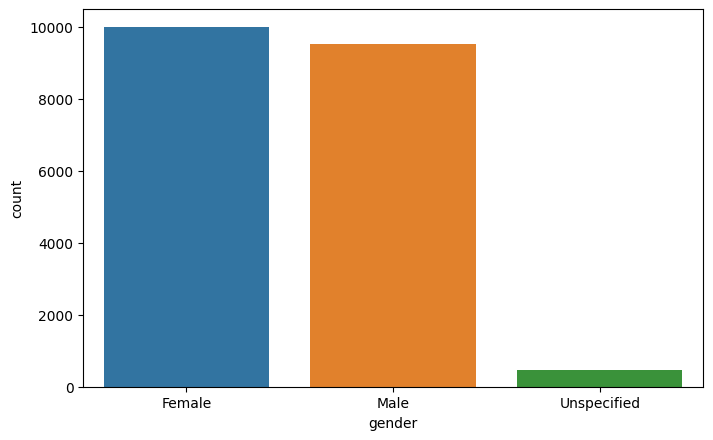

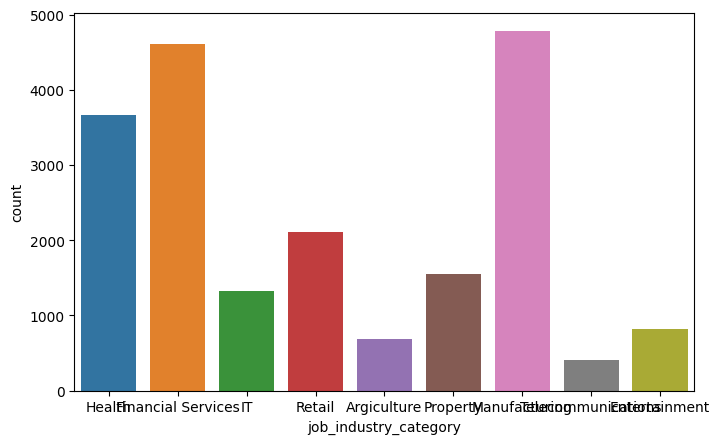

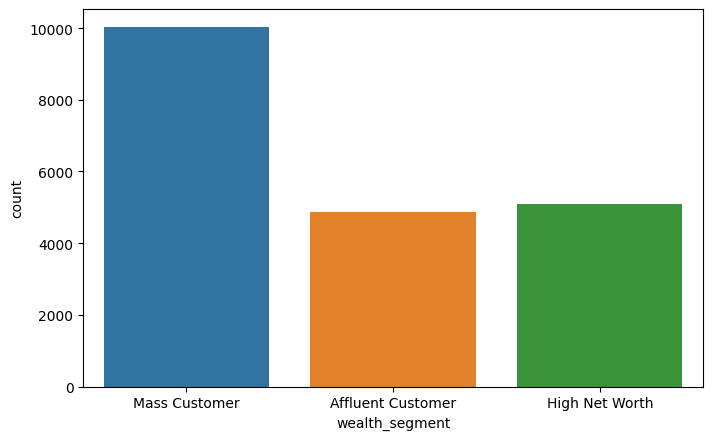

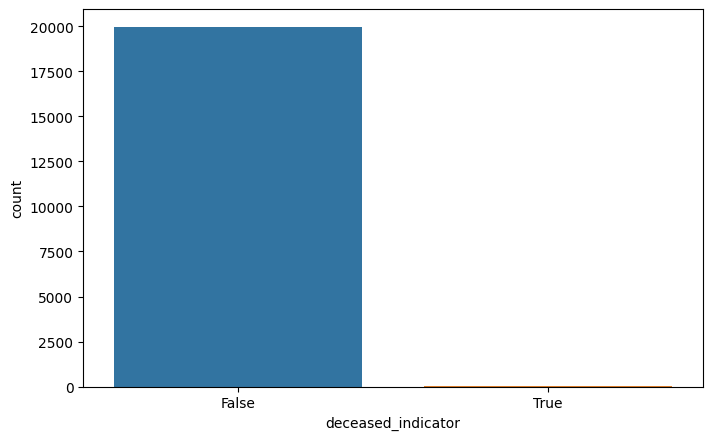

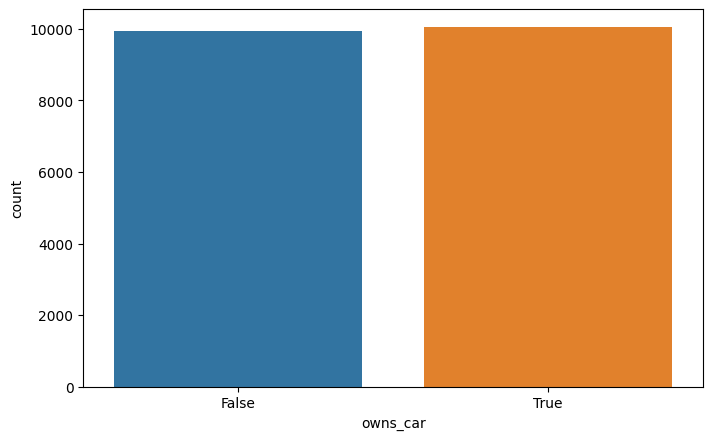

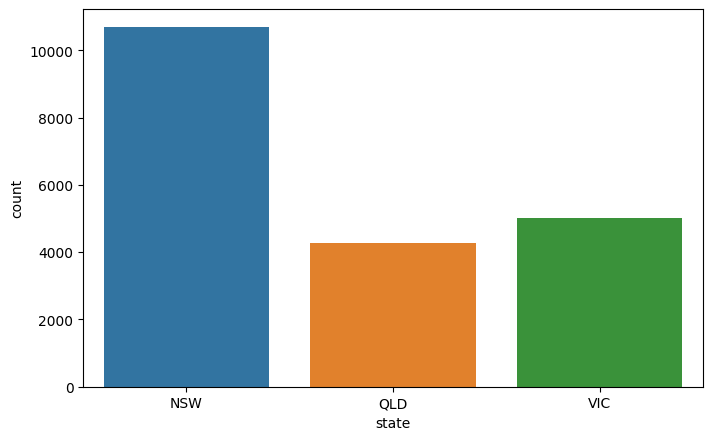

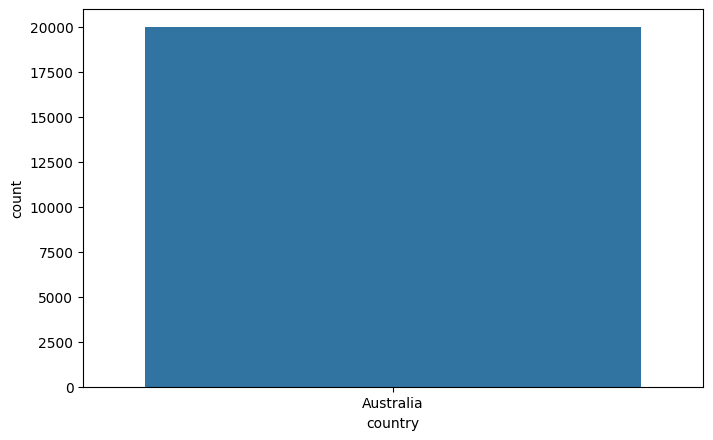

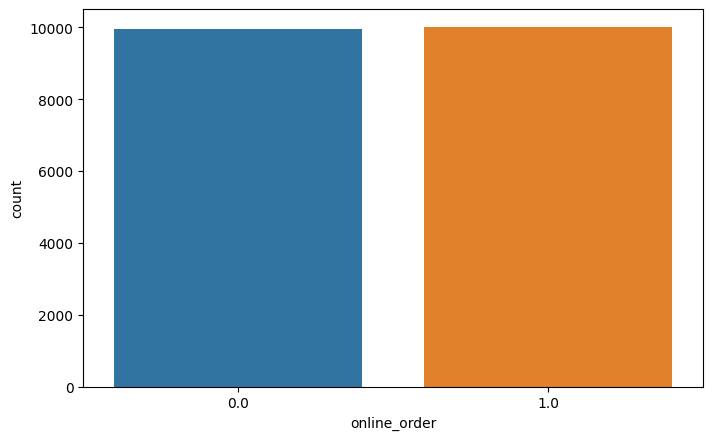

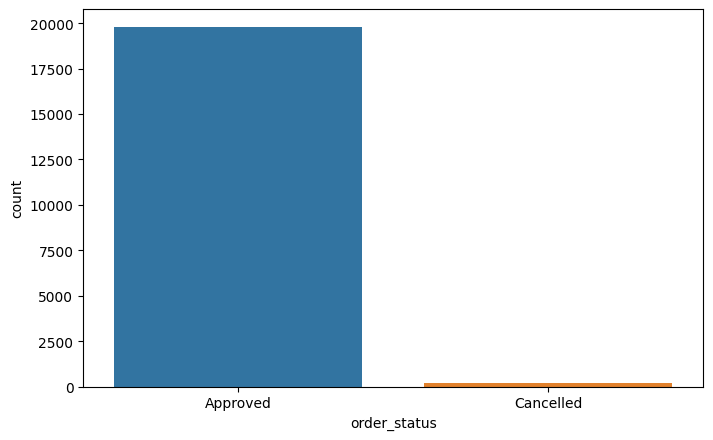

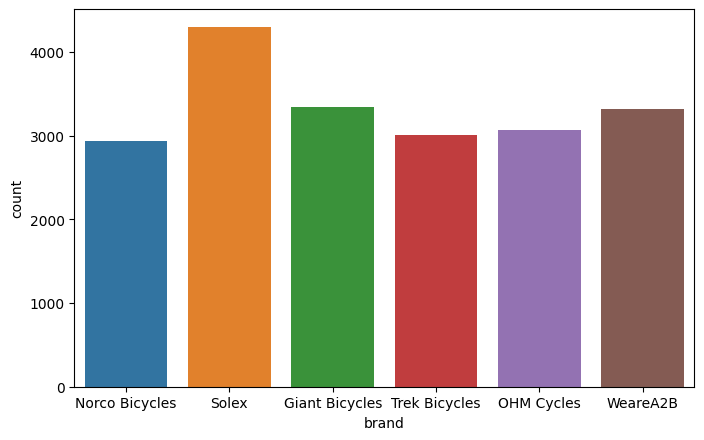

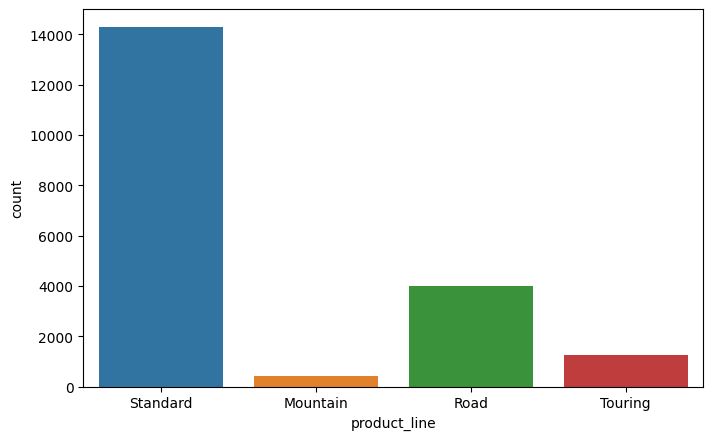

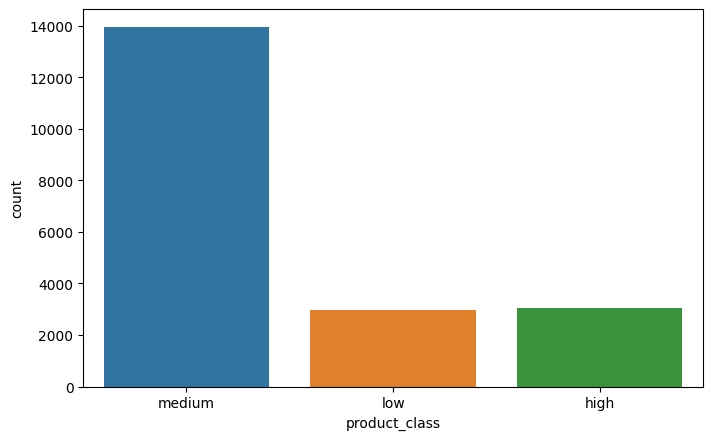

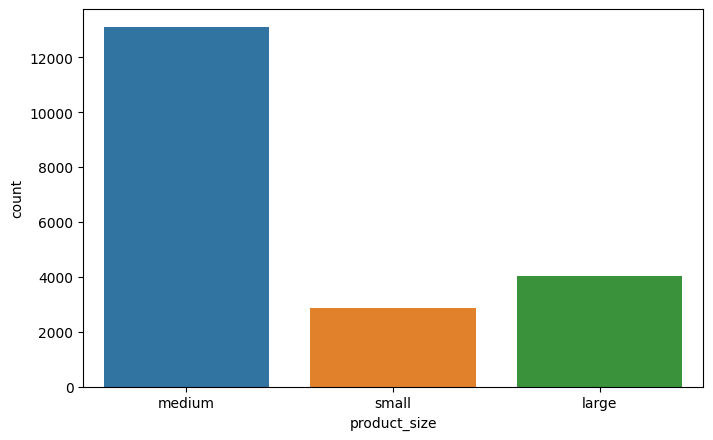

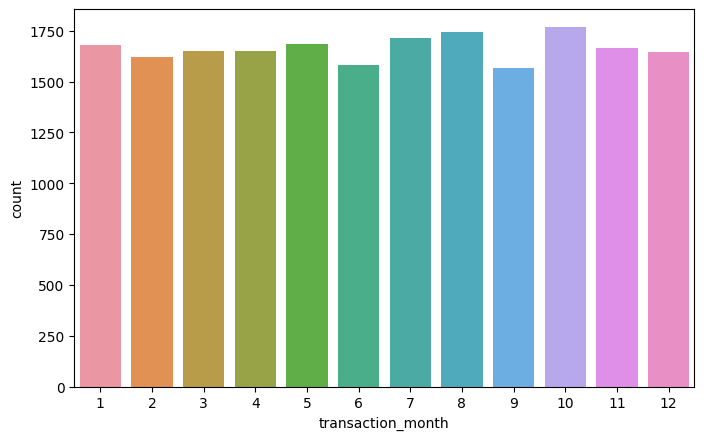

In [470]:
def countplots(cat_list):
  for elem in cat_list:
    plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
    sns.countplot(x = customer_data[elem])
    plt.show()

countplots(categorical_variables)

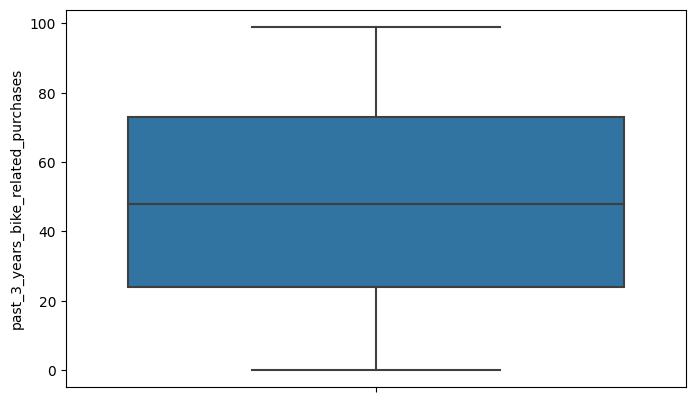

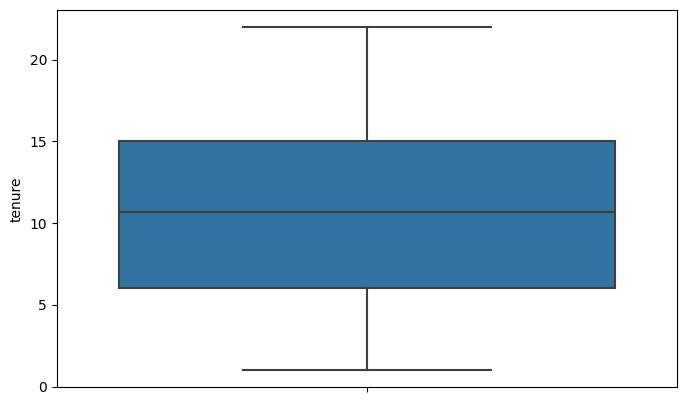

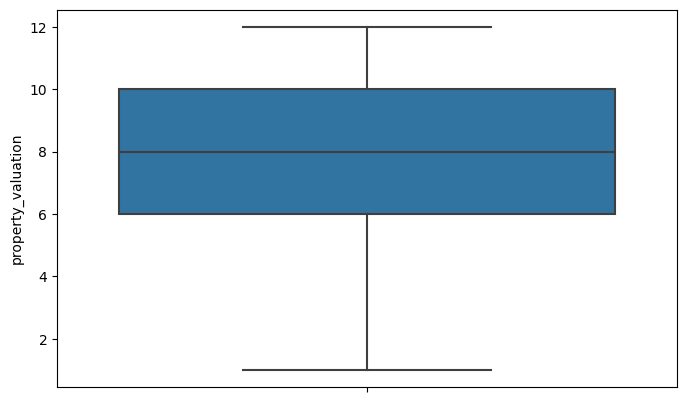

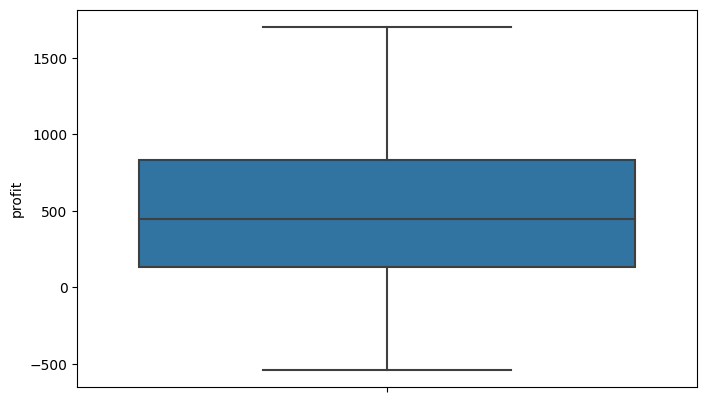

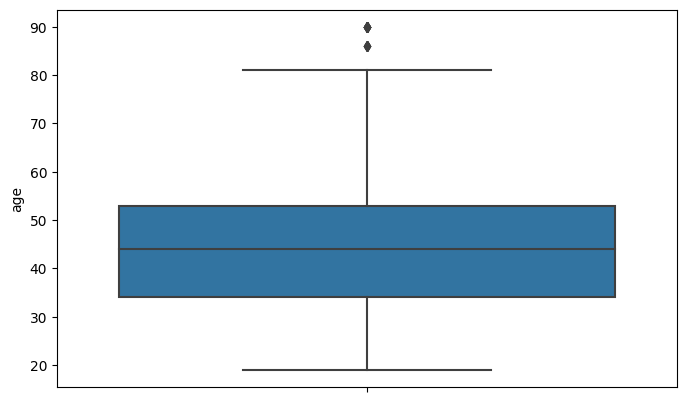

In [473]:
def boxplots(num_list):
  for elem in num_list:
    plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
    sns.boxplot(y = customer_data[elem])
    plt.show()

boxplots(numerical_variables)

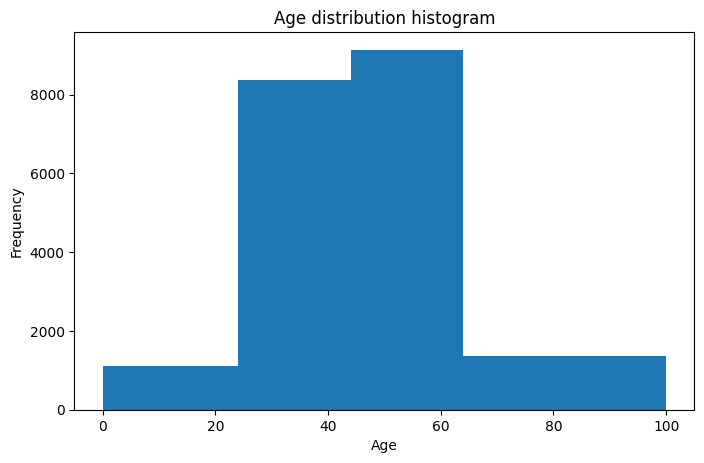

In [475]:
#age distribution
plt.figure(figsize = (8,5))
plt.hist(customer_data['age'], bins=[0,24,44,64,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_dist_histogram.png')
plt.show()

**Exploratory data analysis for Potential Customers**


In [476]:
#data cleaning
new_customers.head(1)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12 00:00:00,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875


In [477]:
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            1000 non-null   object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  1000 non-null   object 
 5   job_title                            1000 non-null   object 
 6   job_industry_category                1000 non-null   object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [478]:
new_customers['DOB'] = pd.to_datetime(new_customers['DOB'], errors='coerce')

In [480]:
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            1000 non-null   object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            1000 non-null   object        
 6   job_industry_category                1000 non-null   object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [481]:
new_customers['DOB'].fillna(method='ffill', inplace = True)

In [482]:
new_customers['age'] = new_customers['DOB'].apply(lambda x: age(x))
new_customers.drop('DOB',axis=1,inplace=True)

In [484]:
cat_list = ['gender','job_industry_category','wealth_segment','deceased_indicator','owns_car','state','country']
num_list = [elem for elem in new_customers.describe() if elem not in cat_list]

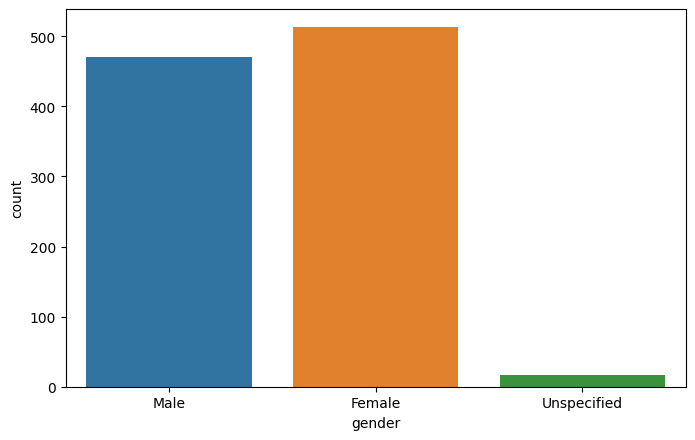

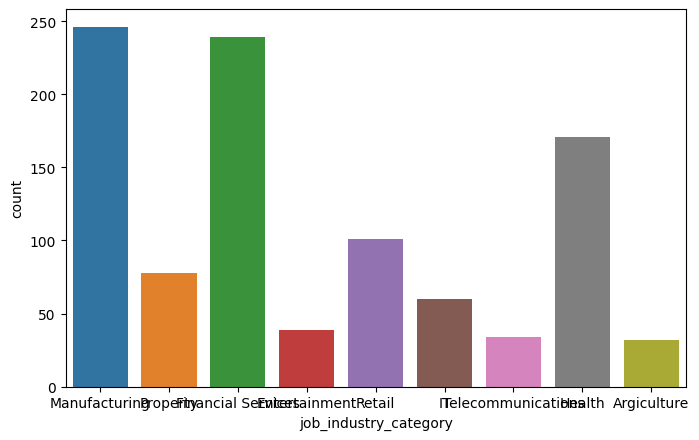

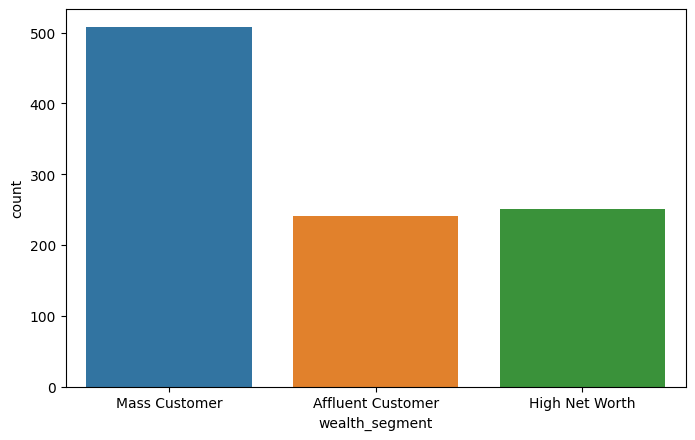

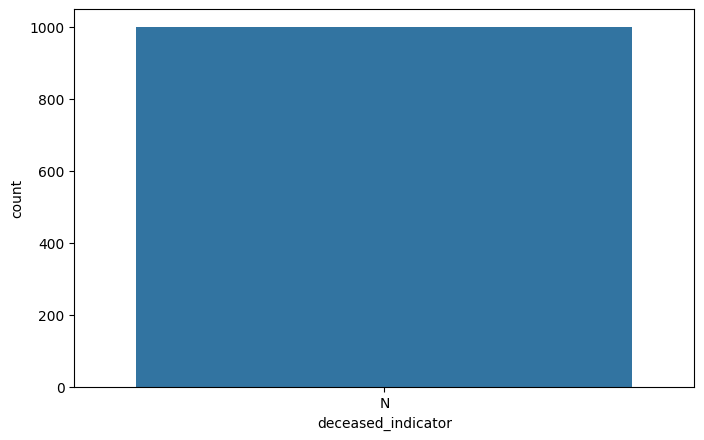

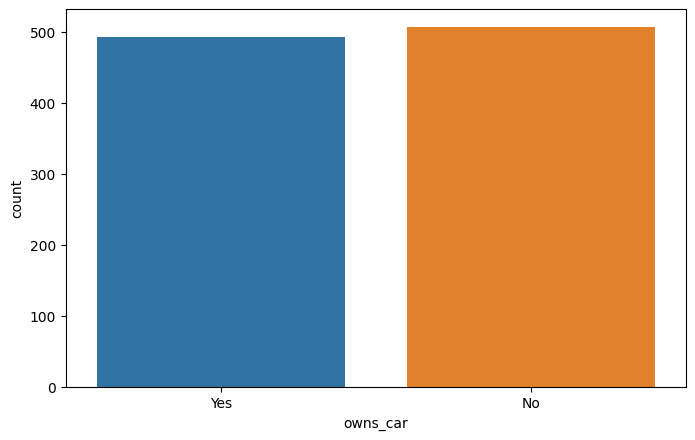

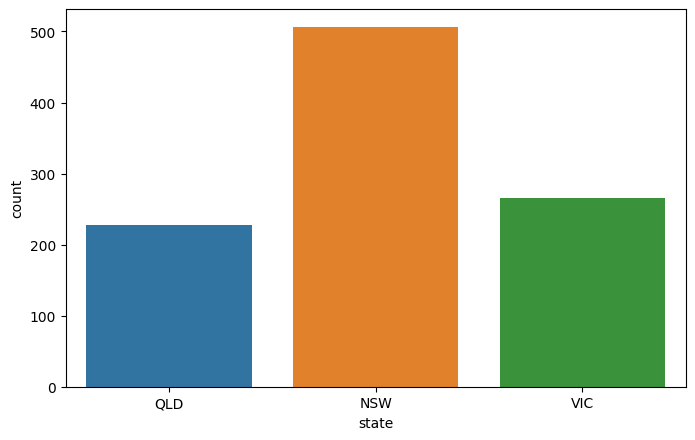

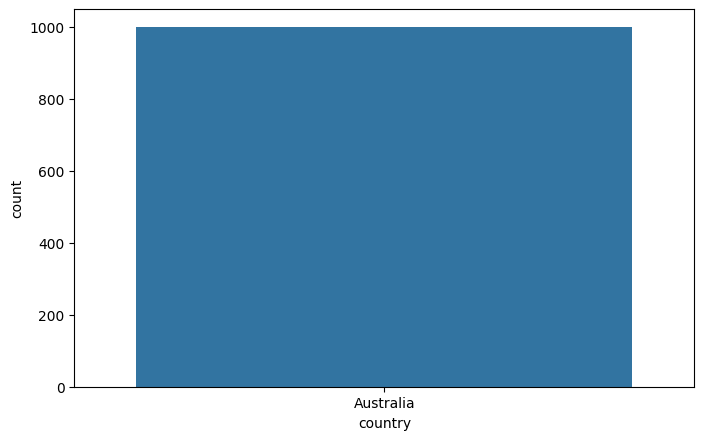

In [485]:
def countplots(cat_list):
  for elem in cat_list:
    plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
    sns.countplot(x = new_customers[elem])
    plt.show()

countplots(cat_list)

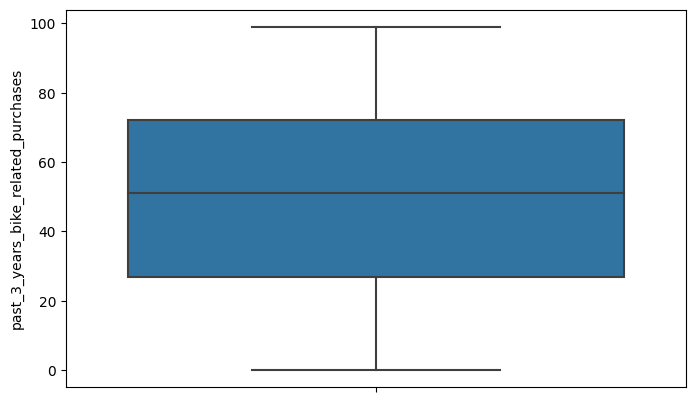

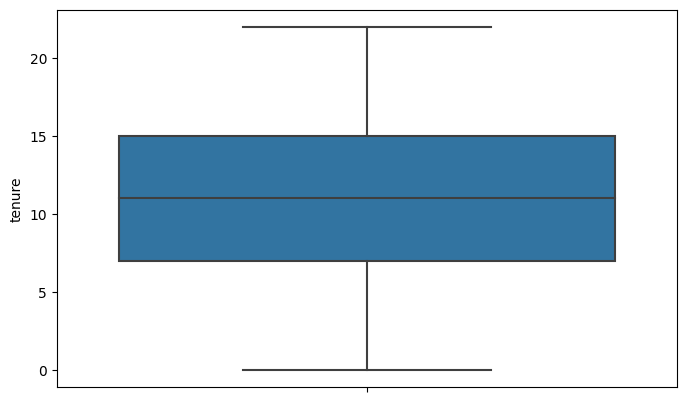

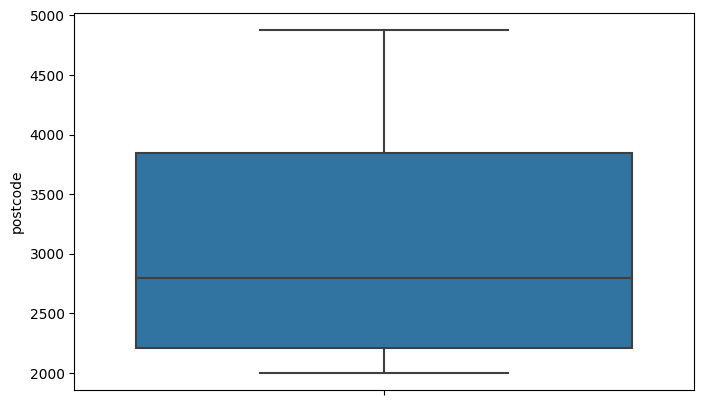

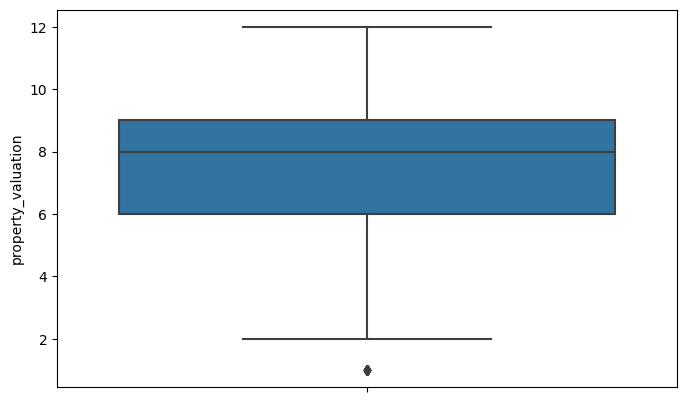

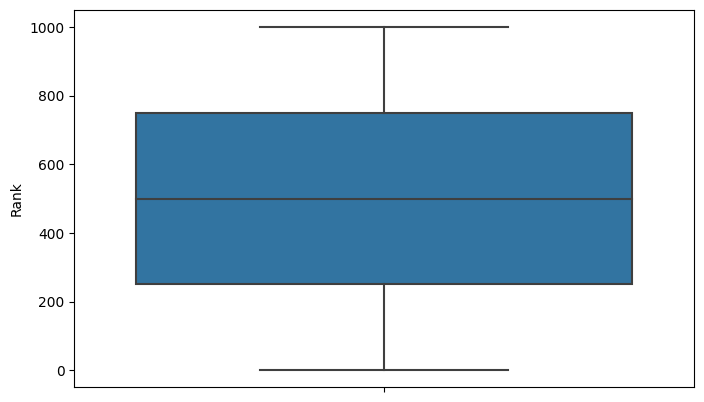

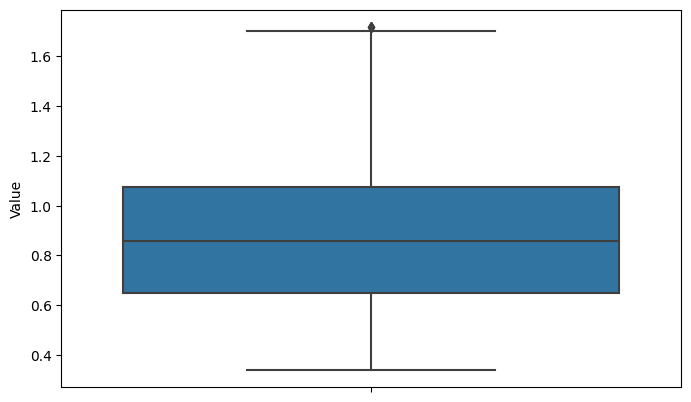

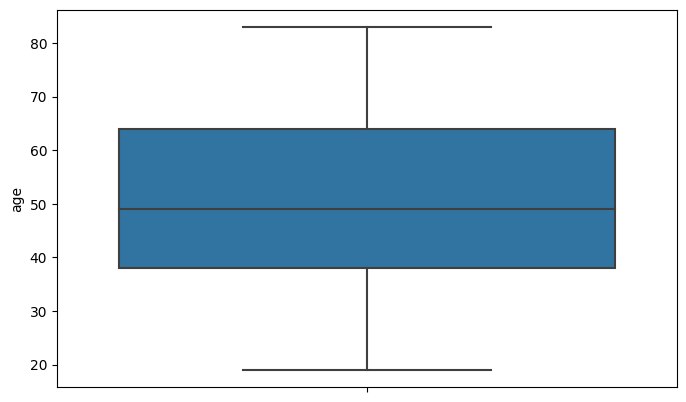

In [486]:
def boxplots(num_list):
  for elem in num_list:
    plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
    sns.boxplot(y = new_customers[elem])
    plt.show()

boxplots(num_list)

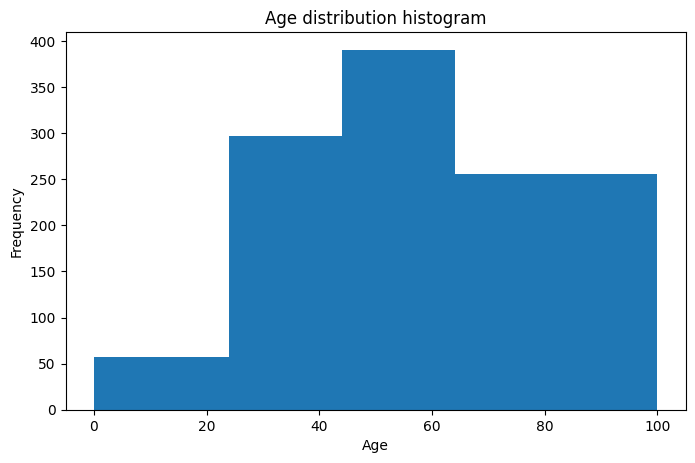

In [487]:
#age distribution
plt.figure(figsize = (8,5))
plt.hist(new_customers['age'], bins=[0,24,44,64,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_dist_histogram.png')
plt.show()

##**Conclusion**
Upon analyzing the previous customer data it all these points can be concluded:
* Females are higher in customer list but almost equal to men, doesn't really give us the information to target which gender in terms of marketing.
* More customers are from Manufacturing, Financial and Health industries.
* Mass Customers are more than affluent and high net worth customers, they can be targeted.
* NSW customers are highest in number.
* Solex brand is much popular.
* Standard and Medium bicycles are much popular.
* Age group 40-60 is much more interested in purchasing bicycles.